In [1]:
include("TSP_and_SOM.jl")

hMM_som (generic function with 1 method)

# Load a natural color image:

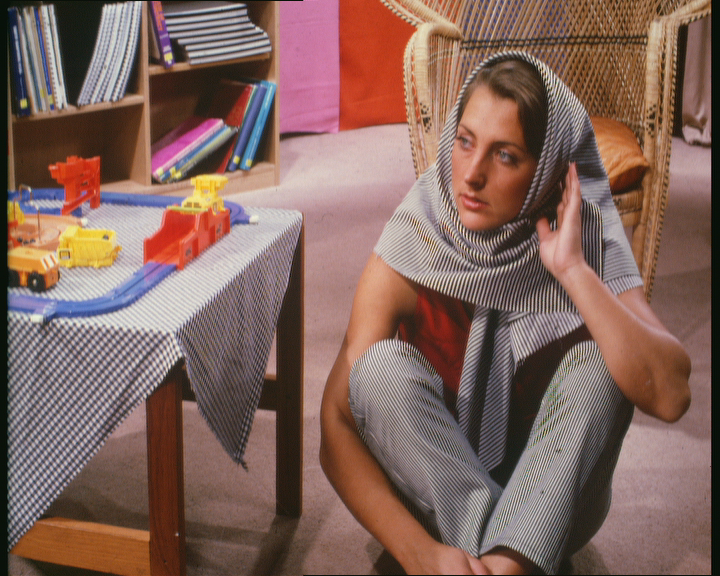

In [2]:
using TestImages
using ImageShow
imI = testimage("barbara_color")

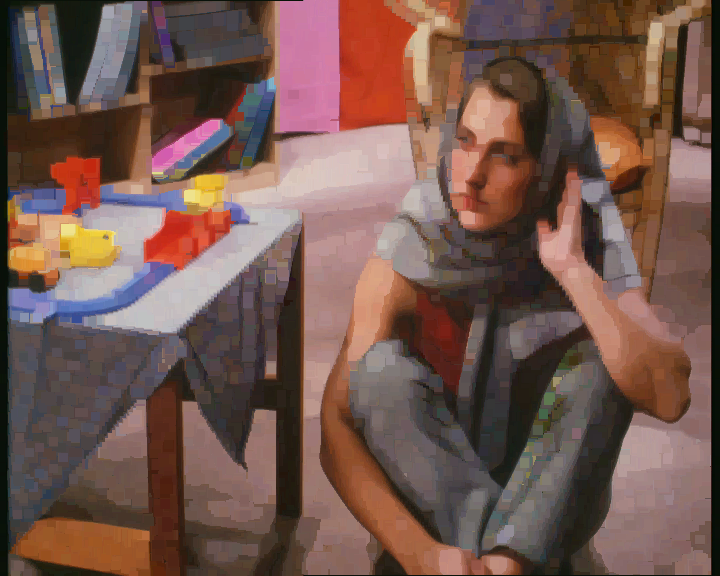

In [3]:
# Structuring element is a 9x9 square

function nine_dilate(img)
    SE_size = 4;
    img_d = copy(img)
    for i = 1:SE_size
        img_d = dilate(img_d)
    end
    return img_d
end

function nine_erode(img)
    SE_size = 4;
    img_d = copy(img)
    for i = 1:SE_size
        img_d = erode(img_d)
    end
    return img_d
end

function nine_opening(img)
    return nine_dilate(nine_erode(img))
end

W = som(imI)
Jsom = hMM_som(imI, W, nine_opening)

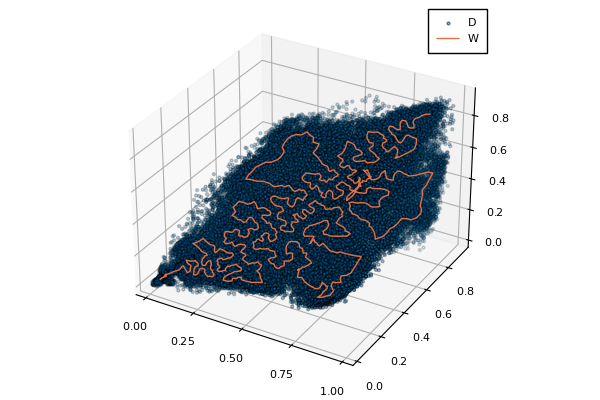

In [4]:
using Plots
pyplot()
D = reshape(channelview(imI), 3, prod(size(imI)))'
graph1 = scatter(D[:,1], D[:,2], D[:,3], ms=2, ma=0.5, label = "D")
graph2 = plot!(W[:,1], W[:,2], W[:,3], label = "W")